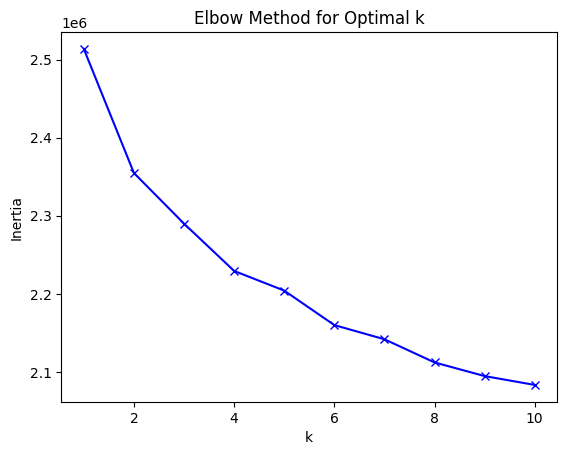

Cluster 0:
TECH1_W99                                             Mostly positive
CNCEXC_W99                              Equally concerned and excited
EXCITEOE_W99_OE1                           Makes life, society better
EXCITEOE_W99_OE2                           Saves time, more efficient
EXCITEOE_W99_OE3                                Helps with work/labor
ALGFAIR_W99                                                  Not sure
DISCRIM1_a_W99                                               Not sure
DISCRIM1_b_W99                                               Not sure
DISCRIM1_c_W99                                               Not sure
DISCRIM1_d_W99                                               Not sure
DISCRIM1_e_W99                                               Not sure
DISCRIM1_f_W99                                               Not sure
F_AGECAT                                                        30-49
F_GENDER                                                      A woman
F_EDUCCAT

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load the dataset
data_df = pd.read_csv('https://raw.githubusercontent.com/ggotoo/AI-Fundamentals-Groupwork/main/dataset/AI_Condensed_Data_Useful_Data.csv')
data_df.set_index('QKEY', inplace=True)

# Select relevant columns for clustering
relevant_columns = [
    'TECH1_W99', 'CNCEXC_W99', 'EXCITEOE_W99_OE1', 'EXCITEOE_W99_OE2', 'EXCITEOE_W99_OE3', 'ALGFAIR_W99', 'DISCRIM1_a_W99', 'DISCRIM1_b_W99', 'DISCRIM1_c_W99', 'DISCRIM1_d_W99', 'DISCRIM1_e_W99', 'DISCRIM1_f_W99', 'F_AGECAT', 'F_GENDER', 'F_EDUCCAT2', 'F_RACETHNMOD', 'F_CITIZEN', 'DCARS1_W99', 'DCARS2_W99', 'DCARS3_W99', 'DCARS4_a_W99', 'DCARS4_b_W99', 'DCARS4_c_W99', 'DCARS4_d_W99', 'DCARS5_W99', 'DCARS6_W99', 'DCARS7_W99', 'DCARS8_a_W99', 'DCARS8_b_W99', 'DCARS8_c_W99', 'DCARS8_d_W99', 'DCARS9_W99', 'DCARS10_W99', 'DCARS11_a_W99', 'DCARS11_b_W99', 'DCARS11_c_W99', 'DCARS11_d_W99', 'DCARS12_W99', 'DCARS13_a_W99', 'DCARS13_b_W99', 'DCARS13_c_W99', 'DCARS13_d_W99', 'F_MARITAL', 'F_RELIG', 'F_PARTY_FINAL', 'F_REG', 'F_INC_TIER2'
]
data_df = data_df[relevant_columns]

# Separate numerical and categorical columns
numerical_columns = []
categorical_columns = [col for col in data_df.columns if col not in numerical_columns]

# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
data_df_imputed = pd.DataFrame(imputer.fit_transform(data_df), columns=data_df.columns, index=data_df.index)

# One-hot encode categorical variables
onehot_encoder = OneHotEncoder(handle_unknown='ignore')
onehot_encoded = onehot_encoder.fit_transform(data_df_imputed[categorical_columns])

# Create a DataFrame with the one-hot encoded variables
onehot_encoded_df = pd.DataFrame(
    onehot_encoded.toarray(), 
    columns=onehot_encoder.get_feature_names_out(categorical_columns),
    index=data_df_imputed.index
)

# Combine numerical and one-hot encoded data
data_df_final = pd.concat([data_df_imputed[numerical_columns], onehot_encoded_df], axis=1)

# Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_df_final)

# Determine the optimal number of clusters using the elbow method
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(k_range, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Run K-means clustering with the optimal number of clusters
optimal_k = 3  # Replace with the value determined from the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(data_scaled)

# Add cluster labels to the original dataframe
data_df['Cluster'] = cluster_labels

# Analyze cluster characteristics
for cluster in range(optimal_k):
    print(f"Cluster {cluster}:")
    print(data_df[data_df['Cluster'] == cluster].mode().iloc[0])
    print("\n")

In [9]:
import pandas as pd
import plotly.express as px



# Create a new dataframe with the count of each combination
treemap_data = data_df.groupby(['EXCITEOE_W99_OE1', 'F_GENDER', 'F_PARTY_FINAL']).size().reset_index(name='count')

# Remove rows with missing values
treemap_data = treemap_data.dropna()

# Create the treemap
fig = px.treemap(treemap_data, 
                 path=['EXCITEOE_W99_OE1', 'F_GENDER', 'F_PARTY_FINAL'], 
                 values='count',
                 color='count',
                 color_continuous_scale='RdBu',
                 title='Treemap of EXCITEOE_W99_OE1, Gender, and Party Affiliation')

# Update layout for better readability
fig.update_traces(textinfo="label+value+percent parent")

# Show the plot
fig.show()

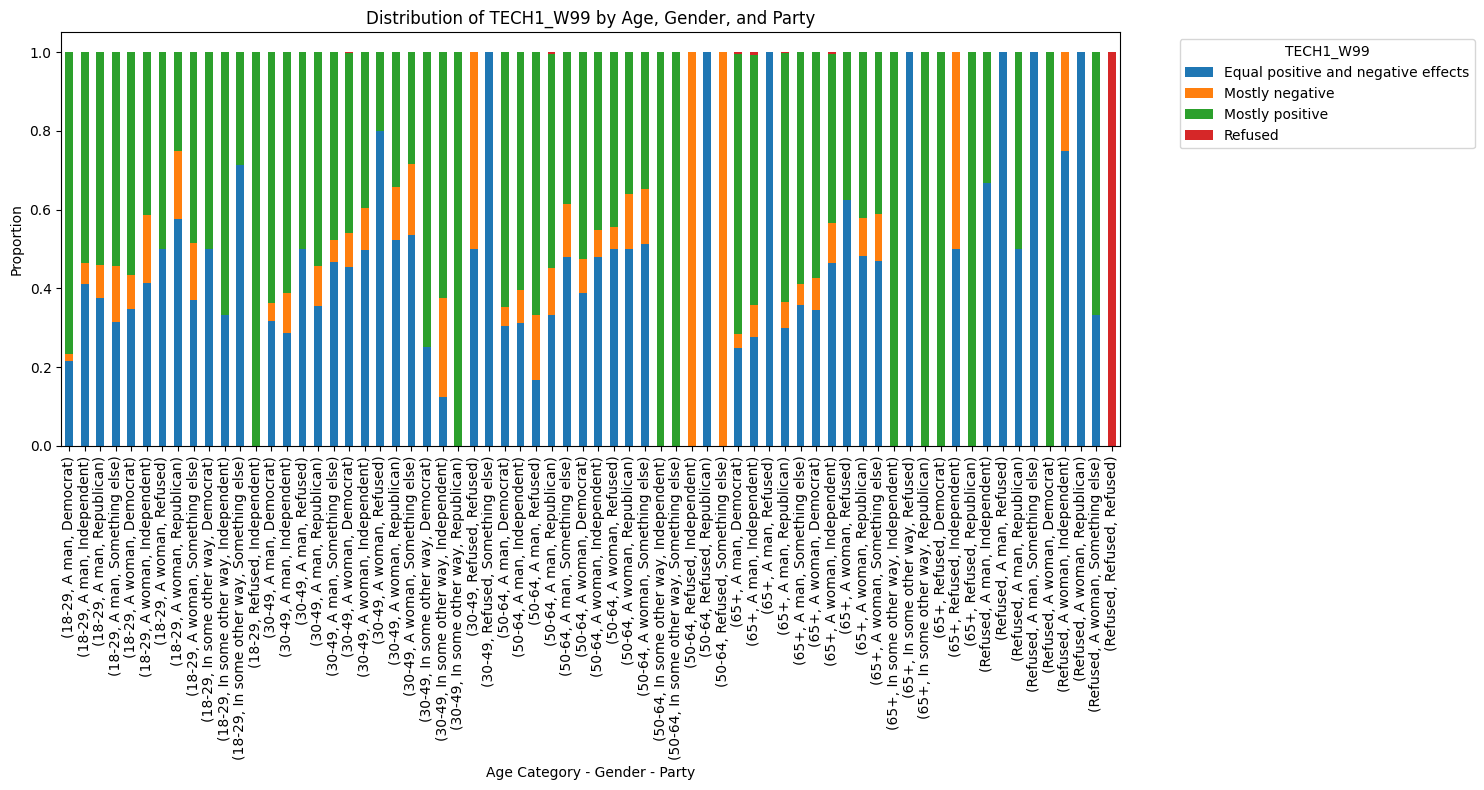

In [21]:
import matplotlib.pyplot as plt

# Create a grouped bar chart
data_grouped = data_df.groupby(['F_AGECAT', 'F_GENDER', 'F_PARTY_FINAL'])['TECH1_W99'].value_counts(normalize=True).unstack()

data_grouped.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Distribution of TECH1_W99 by Age, Gender, and Party')
plt.xlabel('Age Category - Gender - Party')


In [ ]:
plt.ylabel('Proportion')
plt.legend(title='TECH1_W99', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [23]:
import pandas as pd
import numpy as np



# Create the four-way contingency table
contingency_table = pd.crosstab(
    [data_df['F_AGECAT'], data_df['F_GENDER'], data_df['F_PARTY_FINAL']],
    data_df['TECH1_W99'],
    margins=True
)

# Display the table
print(contingency_table)

# Calculate percentages
contingency_table_percentage = contingency_table.div(contingency_table['All'], axis=0) * 100

# Display the percentage table
print("\nPercentage Table:")
print(contingency_table_percentage)

# Save the tables to CSV files for easier viewing
contingency_table.to_csv('four_way_contingency_table.csv')
contingency_table_percentage.to_csv('four_way_contingency_table_percentage.csv')

TECH1_W99                         Equal positive and negative effects  \
F_AGECAT F_GENDER F_PARTY_FINAL                                         
18-29    A man    Democrat                                         13   
                  Independent                                      23   
                  Republican                                        9   
                  Something else                                   11   
         A woman  Democrat                                         40   
...                                                               ...   
Refused  A woman  Independent                                       3   
                  Republican                                        1   
                  Something else                                    1   
         Refused  Refused                                           0   
All                                                              2036   

TECH1_W99                         Mostly negative 

IndexError: index 3 is out of bounds for axis 0 with size 3

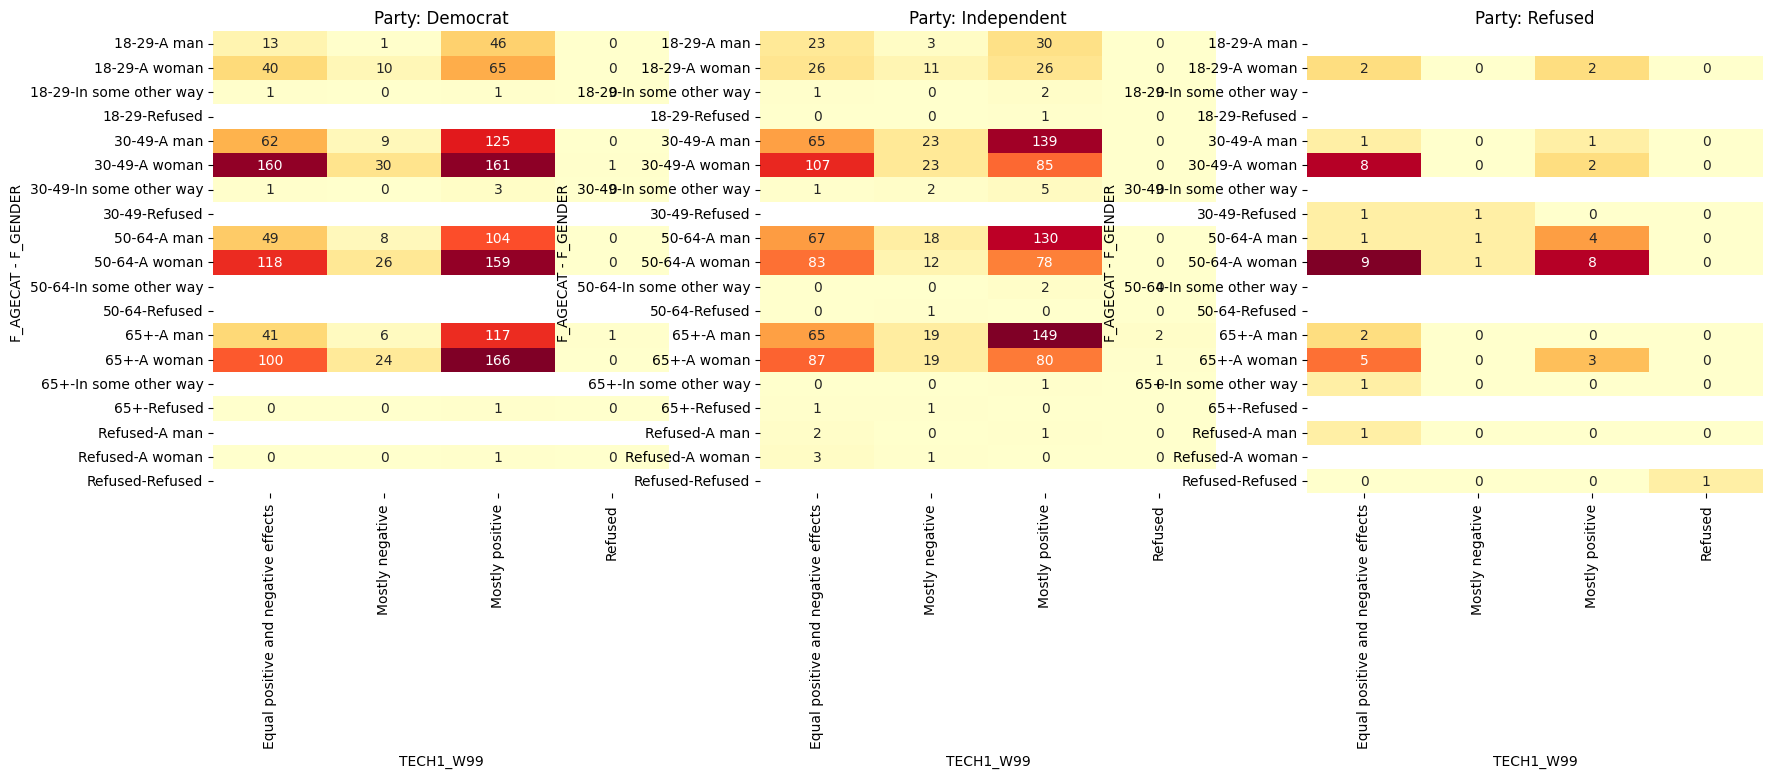

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create the four-way contingency table
contingency_table = pd.crosstab(
    [data_df['F_AGECAT'], data_df['F_GENDER'], data_df['F_PARTY_FINAL']],
    data_df['TECH1_W99']
)

# Reshape the data for heatmap
heatmap_data = contingency_table.unstack(level='F_PARTY_FINAL')

# Create a heatmap for each party
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
parties = heatmap_data.columns.levels[1]

for i, party in enumerate(parties):
    data = heatmap_data.xs(party, level='F_PARTY_FINAL', axis=1)
    sns.heatmap(data, 
                ax=axes[i], 
                cmap='YlOrRd', 
                annot=True, 
                fmt='.0f',  # Use '.0f' to round to nearest integer
                cbar=False)  # Remove color bar for cleaner look
    axes[i].set_title(f'Party: {party}')
    axes[i].set_xlabel('TECH1_W99')
    axes[i].set_ylabel('F_AGECAT - F_GENDER')

plt.tight_layout()
plt.show()

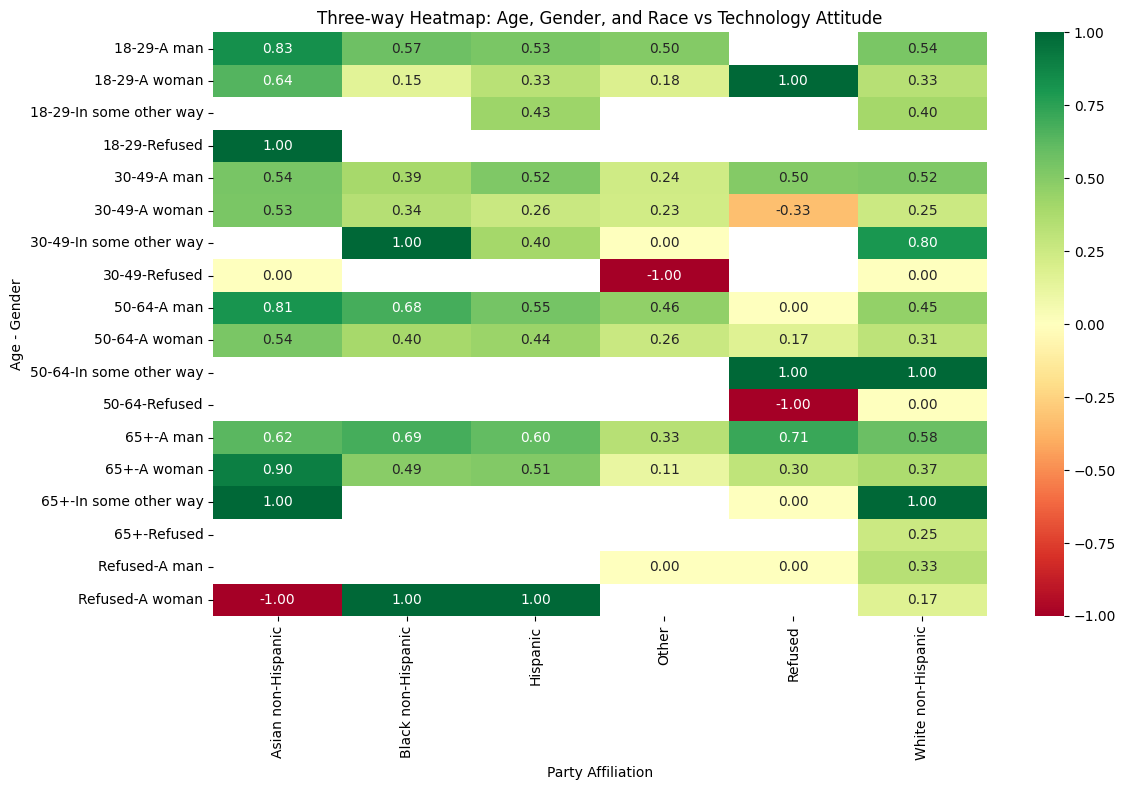

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create the three-way contingency table
contingency_table = pd.crosstab(
    [data_df['F_AGECAT'], data_df['F_GENDER']],
    data_df['F_RACETHNMOD'],
    values=data_df['TECH1_W99'].map({'Mostly positive': 1, 'Mostly negative': -1, 'Equal positive and negative effects': 0}),
    aggfunc='mean'
)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, cmap='RdYlGn', center=0, fmt='.2f')

plt.title('Three-way Heatmap: Age, Gender, and Race vs Technology Attitude')
plt.xlabel('Party Affiliation')
plt.ylabel('Age - Gender')

plt.tight_layout()
plt.show()

This visualization will show you how attitudes towards technology (based on TECH1_W99) vary across different age groups, genders, and political parties. The color of each cell represents the average attitude (red for negative, green for positive), and the number in each cell gives you the exact average score.
Interpreting the heatmap:
Values close to 1 (green) indicate more positive attitudes towards technology
Values close to -1 (red) indicate more negative attitudes
Values close to 0 (yellow) indicate neutral attitudes
This heatmap will allow you to quickly identify patterns, such as which demographic groups tend to have more positive or negative attitudes towards technology, and how these attitudes vary across political parties.

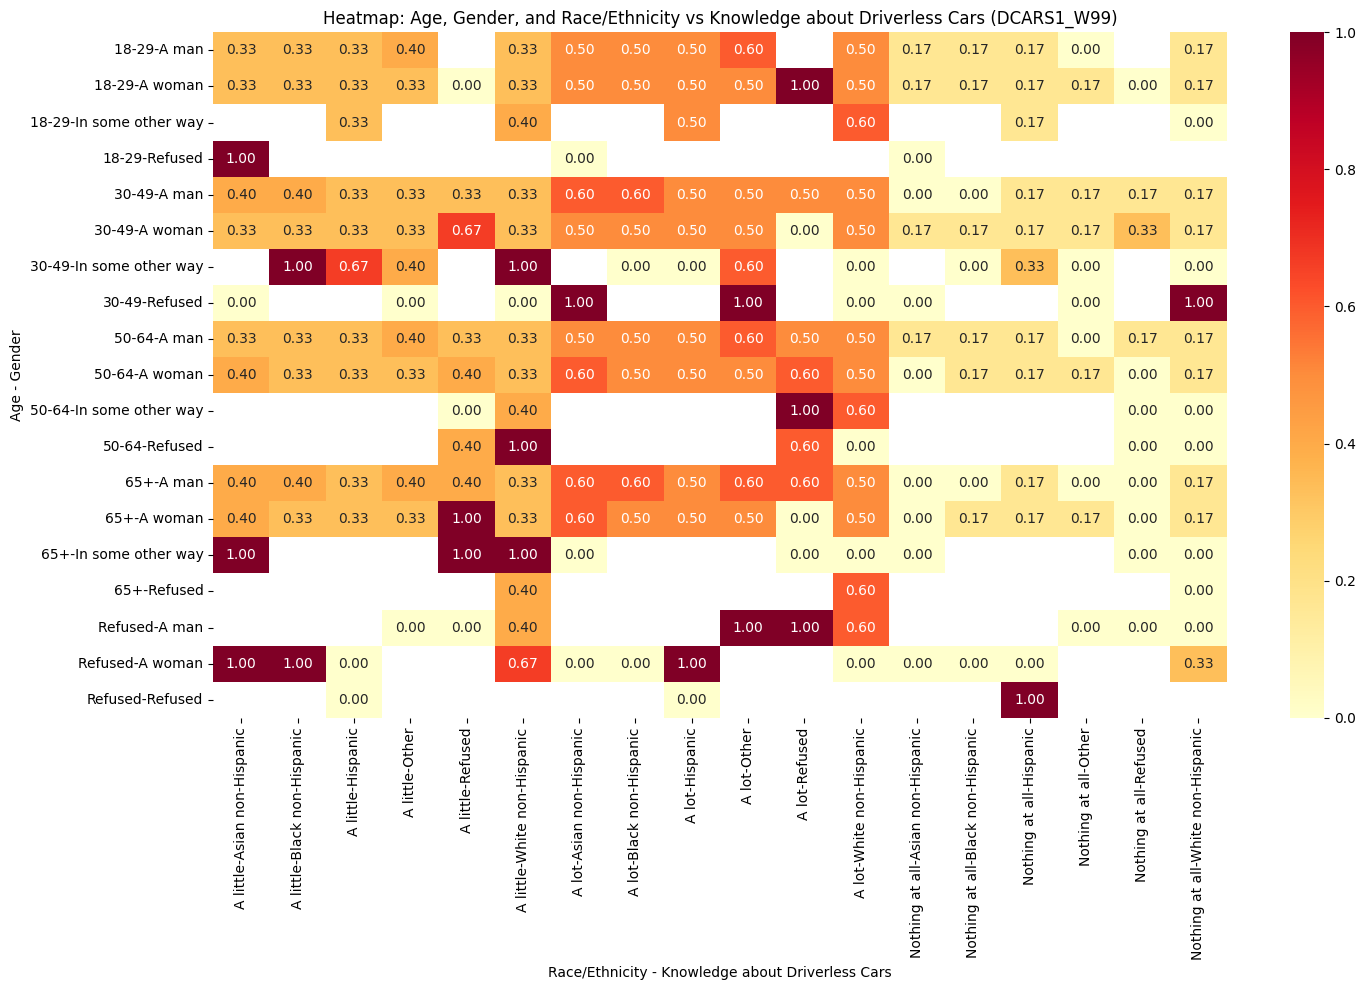

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Create the contingency table
contingency_table = pd.crosstab(
    [data_df['F_AGECAT'], data_df['F_GENDER'], data_df['F_RACETHNMOD']],
    data_df['DCARS1_W99'],
    normalize='index',
    values=data_df['DCARS1_W99'].map({
        'A lot': 3, 
        'A little': 2, 
        'Nothing at all': 1,
        'Not sure': 0
    }),
    aggfunc='mean'
)

# Reshape the table for heatmap
heatmap_data = contingency_table.unstack(level='F_RACETHNMOD')

# Create the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, annot=True, cmap='YlOrRd', fmt='.2f')

plt.title('Heatmap: Age, Gender, and Race/Ethnicity vs Knowledge about Driverless Cars (DCARS1_W99)')
plt.xlabel('Race/Ethnicity - Knowledge about Driverless Cars')
plt.ylabel('Age - Gender')

plt.tight_layout()
plt.show()

This visualization will show you how knowledge about driverless cars (DCARS1_W99) varies across different age groups, genders, and racial/ethnic groups. The color of each cell represents the average response, with darker red indicating more knowledge about driverless cars.
Interpreting the heatmap:
Values closer to 3 (darker red) indicate more knowledge about driverless cars
Values closer to 1 (lighter yellow) indicate less knowledge
Values close to 0 might indicate a higher proportion of 'Not sure' responses
This heatmap will allow you to quickly identify patterns, such as which demographic groups tend to have more or less knowledge about driverless cars, and how this knowledge varies across different racial/ethnic groups.